# Dacon 데이콘 Basic 스트레스 지수 예측 : 건강 데이터로 마음의 균형을 찾아라!
### https://dacon.io/competitions/official/236526/codeshare/12529?page=1&dtype=recent
### github
- https://github.com/HOYUN-Y/DataAnalytics_projects



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib
import scipy.stats as spst

pd.set_option('display.max_columns',None)

In [9]:
path = '../../git_ignore_file/Dataset'

In [10]:
train = pd.read_csv(f'{path}/dacon_stress_prediction/train.csv')
test = pd.read_csv(f'{path}/dacon_stress_prediction/test.csv')
submission = pd.read_csv(f'{path}/dacon_stress_prediction/sample_submission.csv')

In [11]:
display(train.head())
display(test.head())

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working
0,TEST_0000,F,72,161.95,77.66,312.36,137,112,131.16,0.51,moderate,current-smoker,high blood pressure,heart disease,oversleeping,graduate degree,NaN
1,TEST_0001,F,84,152.35,58.70,269.54,162,95,129.36,0.51,intense,current-smoker,NaN,NaN,normal,graduate degree,NaN
2,TEST_0002,F,45,164.09,76.71,209.08,146,91,169.21,1.13,light,ex-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,6.0
3,TEST_0003,M,58,165.06,76.34,246.52,146,98,133.78,0.52,light,current-smoker,heart disease,heart disease,sleep difficulty,high school diploma,10.0
4,TEST_0004,F,35,158.17,65.60,181.24,142,80,73.93,1.42,moderate,ex-smoker,diabetes,heart disease,oversleeping,NaN,7.0


### Data Info
- ID : 샘플별 고유 ID
- gender : 성별
- age : 연령
- height : 키(cm)
- weight : 몸무게(kg)
- cholesterol : 콜레스테롤 수치
- systolic_blood_pressure : 수축기 혈압
- diastolic_blood_pressure : 이완기 혈압
- glucose : 혈당 수치(mg/dL)
- bone_density : 골밀도(g/cm²)
- activity : 생활시 운동 강도
- smoke_status : 흡연 상태
- medical_history : 만성질환
- family_medical_history : 가족력
- sleep_pattern : 수면패턴
- edu_level : 학력
- mean_working : 1주일당 평균 근로 시간
- stress_score : (TARGET) 스트레스 점수 


### purpose
- Target : stress_score


# Data Check & EDA & Feature engineering

### Data Info
- ID : 샘플별 고유 ID
- gender : 성별
- age : 연령
- height : 키(cm)
- weight : 몸무게(kg)
- cholesterol : 콜레스테롤 수치
- systolic_blood_pressure : 수축기 혈압
- diastolic_blood_pressure : 이완기 혈압
- glucose : 혈당 수치(mg/dL)
- bone_density : 골밀도(g/cm²)
- activity : 생활시 운동 강도
- smoke_status : 흡연 상태
- medical_history : 만성질환
- family_medical_history : 가족력

- sleep_pattern : 수면패턴
- edu_level : 학력
- mean_working : 1주일당 평균 근로 시간
- stress_score : (TARGET) 스트레스 점수 

### feature추가
- is_medical_hisotory : 0 / 1
- pulse_pressure : systolic - diastolic
- pulse_pressure_normal : -1(30미만) / 0 / 1(60초과)
- is_family_history : 0 / 1


In [12]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [13]:
display(train.describe())
display(train.info())

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1968.000000,3000.000000
mean,53.06800,168.585687,72.486680,233.910523,146.144333,95.504000,126.467720,0.933367,8.716972,0.482130
std,20.67207,9.351876,13.167222,24.333434,15.845310,9.895283,18.536844,0.444783,1.628944,0.288252
min,17.00000,141.130000,36.320000,148.810000,97.000000,60.000000,70.050000,-0.220000,4.000000,0.000000
25%,35.00000,161.800000,63.035000,216.927500,135.000000,89.000000,113.912500,0.560000,8.000000,0.230000
50%,53.00000,168.115000,71.240000,234.255000,146.000000,95.000000,126.555000,0.940000,9.000000,0.480000
75%,72.00000,175.352500,81.832500,250.377500,158.000000,102.000000,139.180000,1.300000,10.000000,0.730000
max,89.00000,195.280000,120.880000,313.350000,191.000000,124.000000,185.740000,2.000000,16.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

None

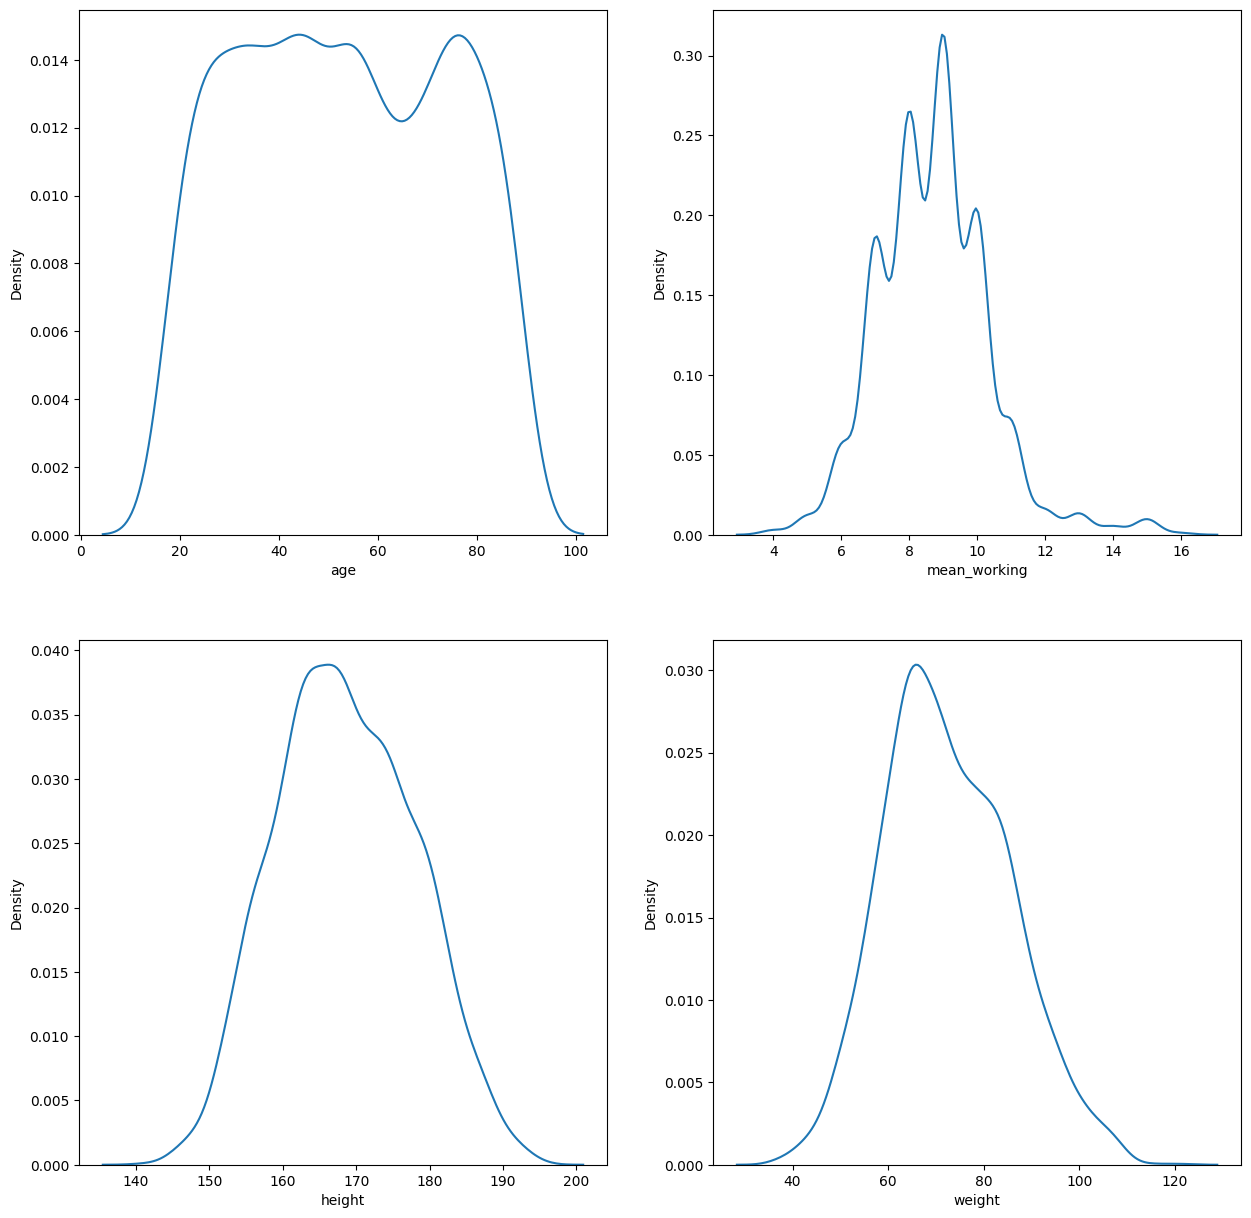

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

sns.kdeplot(train['age'], ax=axes[0,0])
sns.kdeplot(train['mean_working'], ax=axes[0,1])
sns.kdeplot(x='height', data=train, ax=axes[1,0])
sns.kdeplot(x='weight', data=train, ax=axes[1,1])
plt.show()

In [15]:
train[train['age']<20].sort_values('age') #20대 미만은 17살부터, 91개 레코드

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
1738,TRAIN_1738,F,17,174.11,65.44,240.31,110,69,97.25,1.52,moderate,ex-smoker,heart disease,heart disease,oversleeping,bachelors degree,NaN,0.08
940,TRAIN_0940,M,17,173.17,56.04,189.23,149,77,129.32,1.69,moderate,ex-smoker,NaN,NaN,normal,graduate degree,NaN,0.28
1765,TRAIN_1765,M,17,173.27,56.04,189.48,149,77,129.13,1.70,moderate,ex-smoker,NaN,NaN,normal,graduate degree,NaN,0.28
1520,TRAIN_1520,F,17,164.10,57.80,189.95,106,83,97.82,1.54,moderate,non-smoker,NaN,NaN,normal,bachelors degree,NaN,0.66
2899,TRAIN_2899,M,17,175.32,78.54,207.88,141,83,111.80,1.62,moderate,ex-smoker,diabetes,high blood pressure,sleep difficulty,NaN,NaN,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,TRAIN_0794,M,19,185.11,83.28,210.53,106,72,143.20,1.44,light,non-smoker,high blood pressure,high blood pressure,normal,graduate degree,10.0,0.74
719,TRAIN_0719,M,19,177.20,87.62,202.43,117,77,128.97,1.38,light,non-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,7.0,0.37
1330,TRAIN_1330,F,19,156.77,70.76,204.74,141,90,139.90,1.61,light,non-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,8.0,0.38
1791,TRAIN_1791,M,19,162.80,58.81,227.67,133,88,100.00,1.53,moderate,non-smoker,high blood pressure,NaN,sleep difficulty,high school diploma,7.0,0.65


<Axes: xlabel='stress_score', ylabel='Density'>

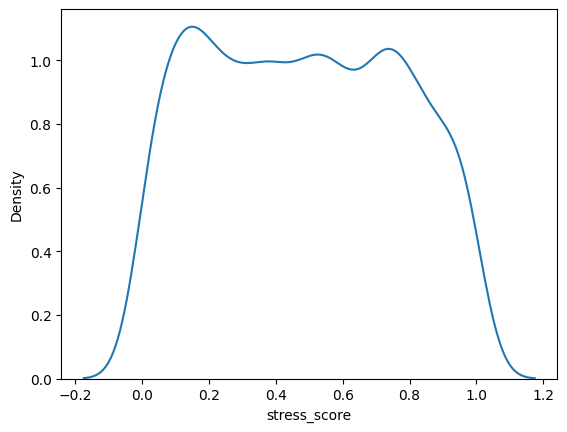

In [16]:
sns.kdeplot(x='stress_score', data=train)

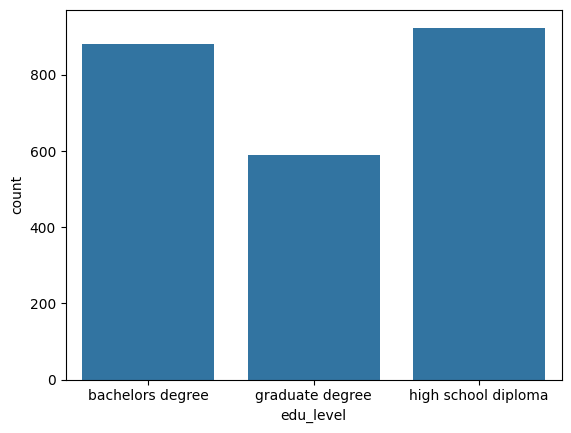

In [17]:
sns.countplot(x='edu_level', data=train)
plt.show()

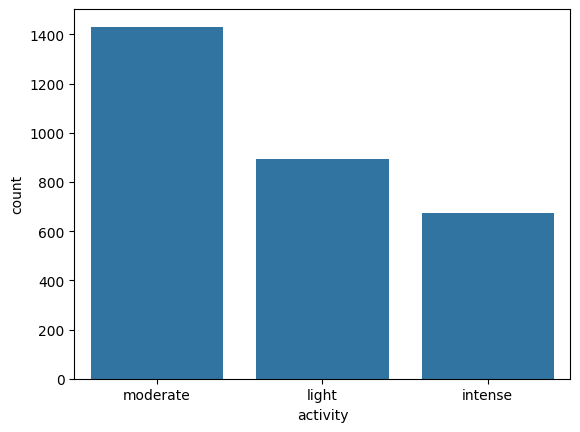

In [18]:
sns.countplot(x='activity', data=train)
plt.show()

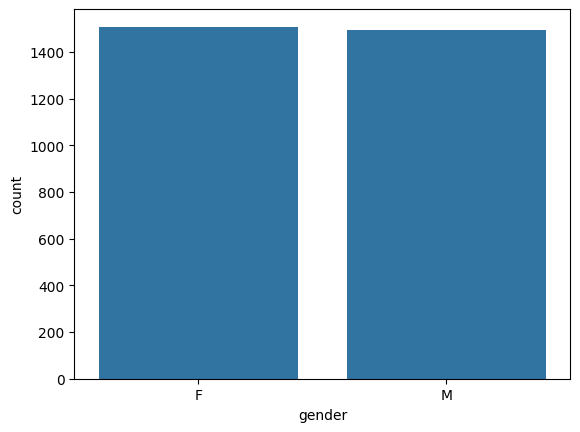

In [19]:
sns.countplot(x='gender', data=train)
plt.show()

<Axes: xlabel='sleep_pattern', ylabel='count'>

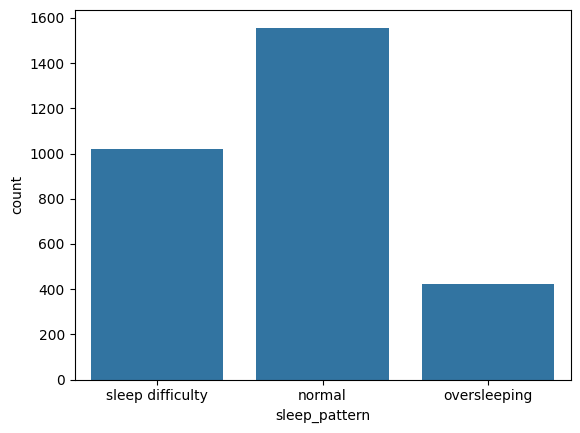

In [20]:
sns.countplot(x='sleep_pattern', data=train)

In [21]:
print('Female : ',len(train[train['gender']=='F']))
print('Male : ',len(train[train['gender']=='M']))

Female :  1508
Male :  1492


# EDA

In [22]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

None

<Axes: xlabel='gender', ylabel='stress_score'>

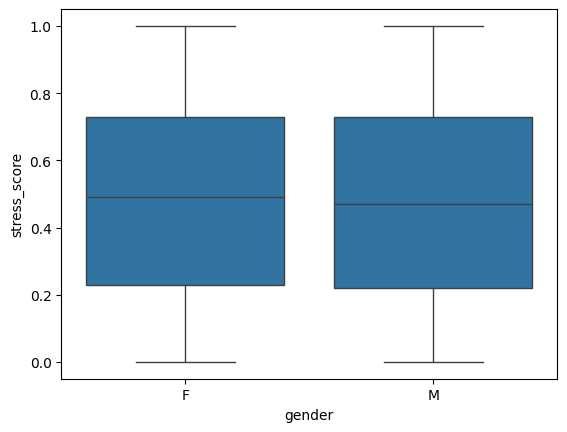

In [23]:
sns.boxplot(x='gender', y='stress_score', data=train)

<Axes: xlabel='smoke_status', ylabel='stress_score'>

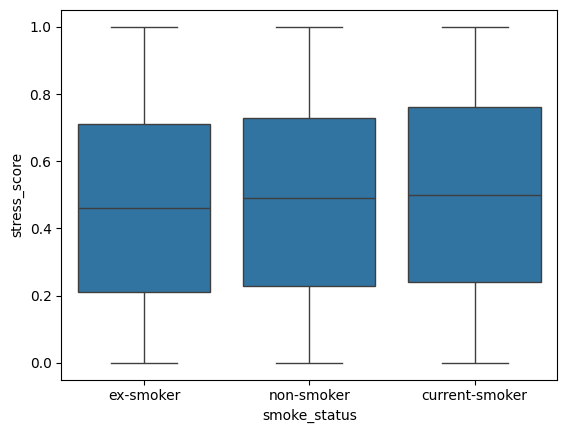

In [24]:
sns.boxplot(x='smoke_status', y='stress_score', data=train)

<Axes: xlabel='activity', ylabel='stress_score'>

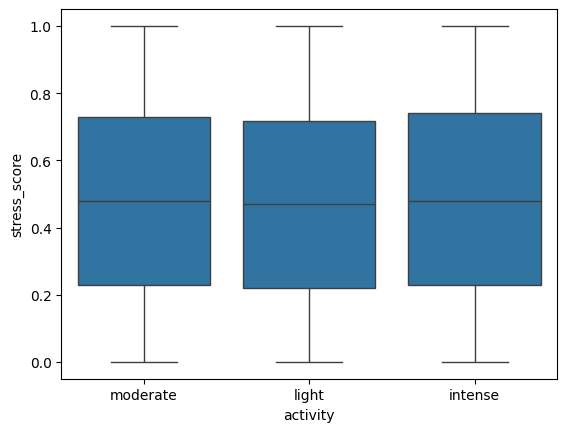

In [25]:
sns.boxplot(x='activity', y='stress_score', data=train)

In [33]:
train['age'].describe()

count    3000.00000
mean       53.06800
std        20.67207
min        17.00000
25%        35.00000
50%        53.00000
75%        72.00000
max        89.00000
Name: age, dtype: float64

In [35]:
#나이대 추가, 10대(17살)~80대(89살)
train['grade'] = train['age']

def age_to_grade(x):
    return  (x // 10) * 10 #80 살의 경우 몫은 8 * 10 하면 80대임

train['grade'] = train['age'].apply(age_to_grade)
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score,grade
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63,70
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83,80
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70,40
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17,60
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36,80


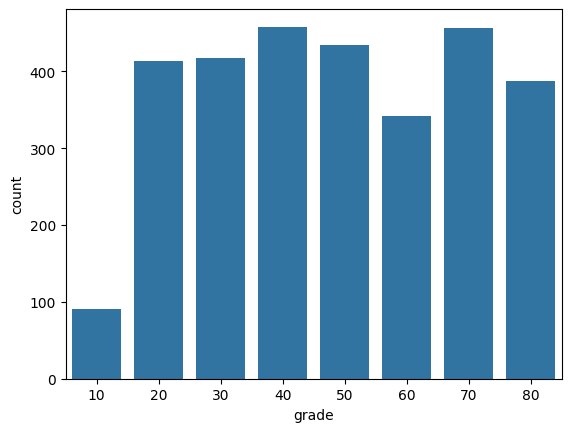

In [38]:
sns.countplot(x='grade', data=train)
plt.show()

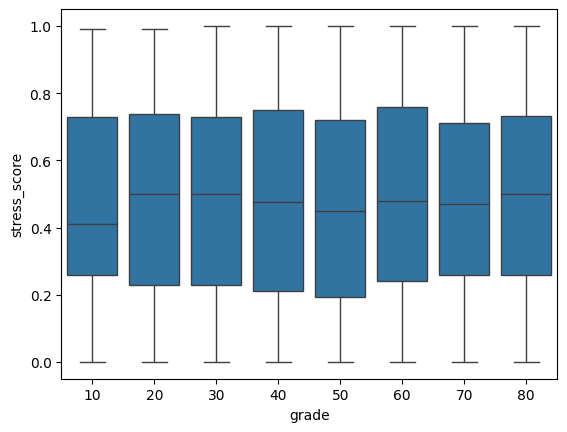

In [36]:
sns.boxplot(x='grade', y='stress_score', data=train)
plt.show()

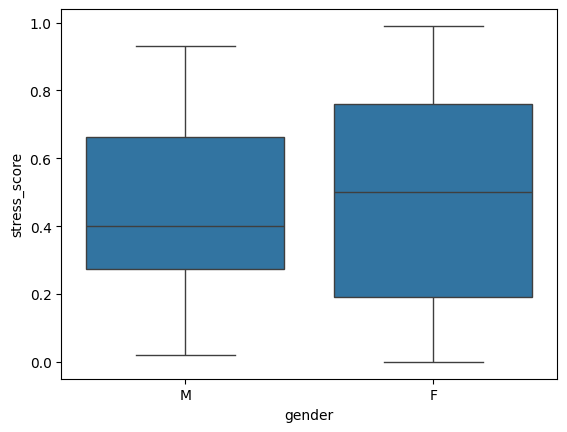

In [32]:
sns.boxplot(x='gender', y='stress_score', data=train[(train['age']<20)])
plt.show()

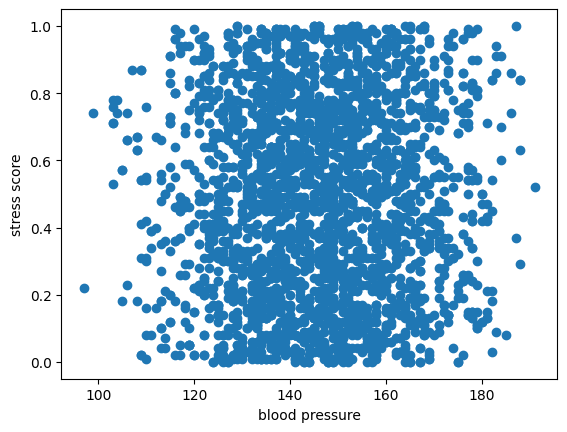

In [29]:
plt.scatter(train['systolic_blood_pressure'], train['stress_score'])
plt.xlabel('blood pressure')
plt.ylabel('stress score')
plt.show()

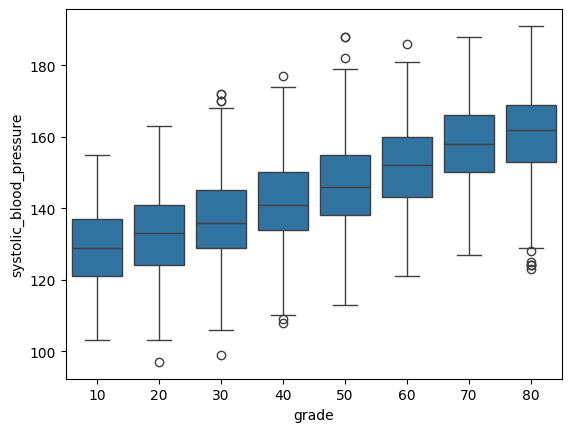

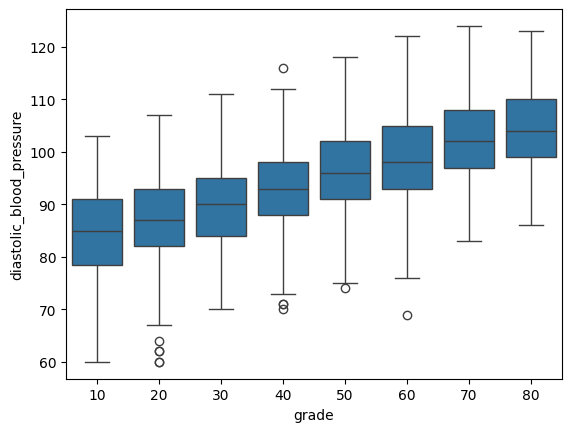

In [40]:
sns.boxplot(x=train['grade'], y=train['systolic_blood_pressure'])
plt.show()
sns.boxplot(x=train['grade'], y=train['diastolic_blood_pressure'])
plt.show()

In [41]:
train['pulse_pressure'] = train['systolic_blood_pressure'] - train['diastolic_blood_pressure']

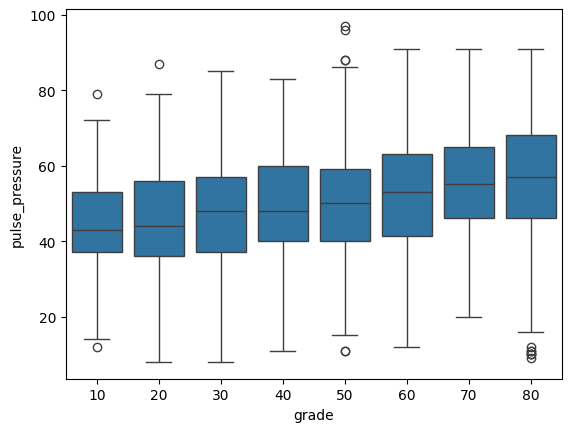

In [42]:
sns.boxplot(x=train['grade'], y=train['pulse_pressure'])
plt.show()

In [45]:
train['pulse_pressure_normal'] = train['pulse_pressure']


In [51]:
def pulse_nor_abnor(x):
    if x < 30:
        return -1
    if x > 60:
        return 1
    else:
        return 0

In [52]:
train['pulse_pressure_normal'] = train['pulse_pressure'].apply(pulse_nor_abnor)

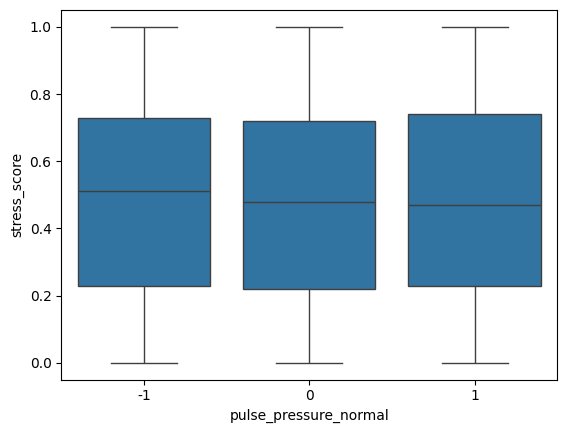

In [56]:
sns.boxplot(x='pulse_pressure_normal', y='stress_score', data=train)
plt.show()

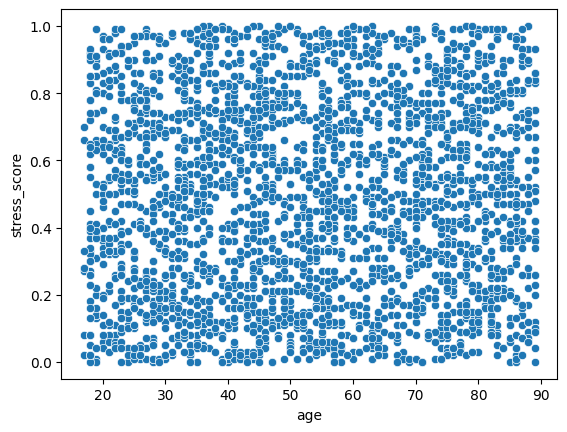

In [30]:
sns.scatterplot(x= train['age'], y= train['stress_score'])
plt.show()

#### medical_history, family_medical_history

In [73]:
display(train['medical_history'].value_counts())
display(train['family_medical_history'].value_counts())

medical_history
high blood pressure    697
heart disease          508
diabetes               506
Name: count, dtype: int64

family_medical_history
diabetes               615
high blood pressure    480
heart disease          419
Name: count, dtype: int64

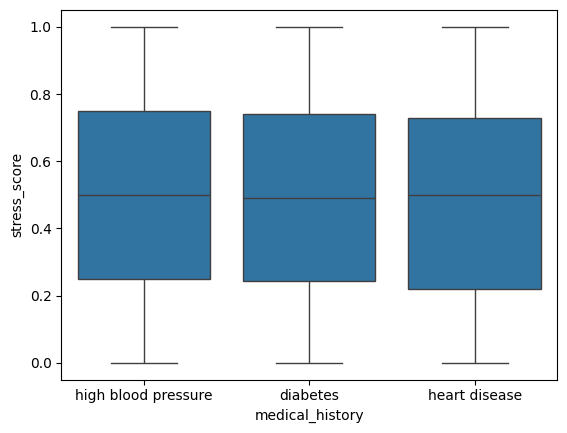

In [75]:
sns.boxplot(x='medical_history', y='stress_score', data=train)
plt.show()

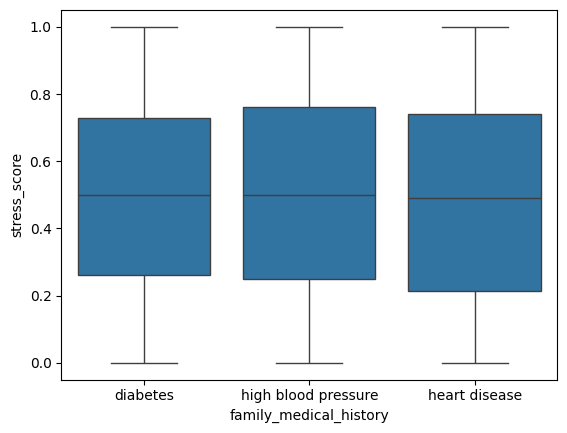

In [76]:
sns.boxplot(x='family_medical_history', y='stress_score', data=train)
plt.show()

#### mean_working & edu_level
- 공백 발생하는 이유 찾기 (나이대?)

1032

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score,grade,pulse_pressure,pulse_pressure_normal
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,0.0,1032.000000,1032.000000,1032.000000,1032.000000
mean,74.395349,169.065727,72.368692,244.930048,156.919574,101.820736,135.295068,0.500504,NaN,0.491211,69.321705,55.098837,0.322674
std,14.772661,9.390366,13.395515,23.142073,14.066157,8.827907,17.526009,0.335073,NaN,0.280061,15.450719,14.896341,0.551472
min,17.000000,144.060000,37.510000,171.030000,106.000000,60.000000,81.760000,-0.220000,NaN,0.000000,10.000000,9.000000,-1.000000
25%,71.000000,162.265000,62.482500,230.067500,149.000000,96.000000,123.795000,0.300000,NaN,0.260000,70.000000,45.000000,0.000000
50%,77.000000,168.665000,71.245000,243.795000,158.000000,102.000000,135.385000,0.450000,NaN,0.480000,70.000000,55.000000,0.000000
75%,83.000000,175.437500,82.282500,260.477500,166.000000,108.000000,146.912500,0.600000,NaN,0.730000,80.000000,65.000000,1.000000
max,89.000000,195.280000,109.250000,313.350000,191.000000,124.000000,185.740000,2.000000,NaN,1.000000,80.000000,91.000000,1.000000


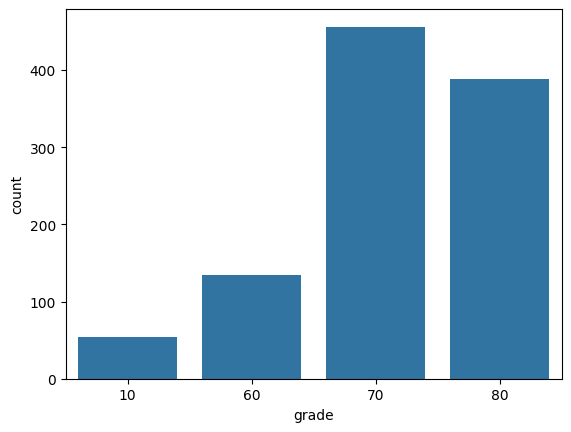

In [ ]:
display(len(train[train['mean_working'].isnull()]))
display(train[train['mean_working'].isnull()].describe())
sns.countplot(x='grade', data=train[train['mean_working'].isnull()])
plt.show() #근로자가 아닌 10대, 60, 70, 80 대임 ==> na 0으로 초기화 가능하다고 생각.

In [66]:
display(len(train[train['edu_level'].isnull()]))
display(train[train['edu_level'].isnull()].describe())

607

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score,grade,pulse_pressure,pulse_pressure_normal
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,369.000000,607.000000,607.000000,607.000000,607.000000
mean,54.367381,168.139390,71.988567,233.150626,146.871499,96.189456,126.267545,0.910395,8.785908,0.511236,49.736409,50.682043,0.184514
std,20.655315,9.484322,13.261131,25.779644,15.646570,9.824803,18.669248,0.451144,1.610164,0.287780,20.567759,14.842831,0.540954
min,17.000000,144.060000,36.320000,162.790000,97.000000,70.000000,73.930000,-0.110000,5.000000,0.000000,10.000000,13.000000,-1.000000
25%,36.500000,160.930000,62.500000,215.720000,136.000000,89.000000,112.930000,0.540000,8.000000,0.250000,30.000000,41.000000,0.000000
50%,56.000000,167.230000,70.440000,233.380000,148.000000,96.000000,126.900000,0.890000,9.000000,0.520000,50.000000,50.000000,0.000000
75%,72.000000,175.340000,81.030000,251.640000,158.000000,104.000000,139.170000,1.275000,10.000000,0.760000,70.000000,61.000000,1.000000
max,89.000000,193.210000,120.880000,301.570000,188.000000,119.000000,185.740000,1.920000,16.000000,1.000000,80.000000,91.000000,1.000000


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

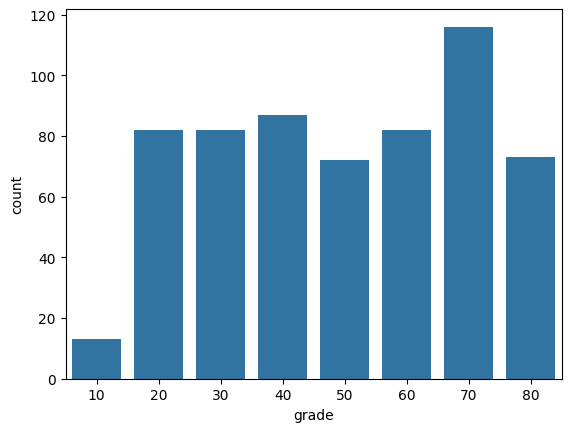

In [65]:
sns.countplot(x='grade', data=train[train['edu_level'].isnull()])
plt.show()

# Preprocessing
- 결측치
    - mean_working : 근로자가 아닌 10대, 60, 70, 80 대임 ==> na 0으로 초기화 가능하다고 생각.
    - edu_level : 모르겠음.

In [82]:
train['medical_history'] = train['medical_history'].fillna('None')
train['family_medical_history'] = train['family_medical_history'].fillna('None')

In [83]:
train['mean_working'] = train['mean_working'].fillna(0.0)

In [85]:
train['edu_level'] = train['edu_level'].fillna('None')

In [86]:
train.isna().sum()

ID                          0
gender                      0
age                         0
height                      0
weight                      0
cholesterol                 0
systolic_blood_pressure     0
diastolic_blood_pressure    0
glucose                     0
bone_density                0
activity                    0
smoke_status                0
medical_history             0
family_medical_history      0
sleep_pattern               0
edu_level                   0
mean_working                0
stress_score                0
grade                       0
pulse_pressure              0
pulse_pressure_normal       0
dtype: int64

In [98]:
train['gender'] = train['gender'].apply(lambda x: 1 if x == 'M' else 0)

#### 상관분석

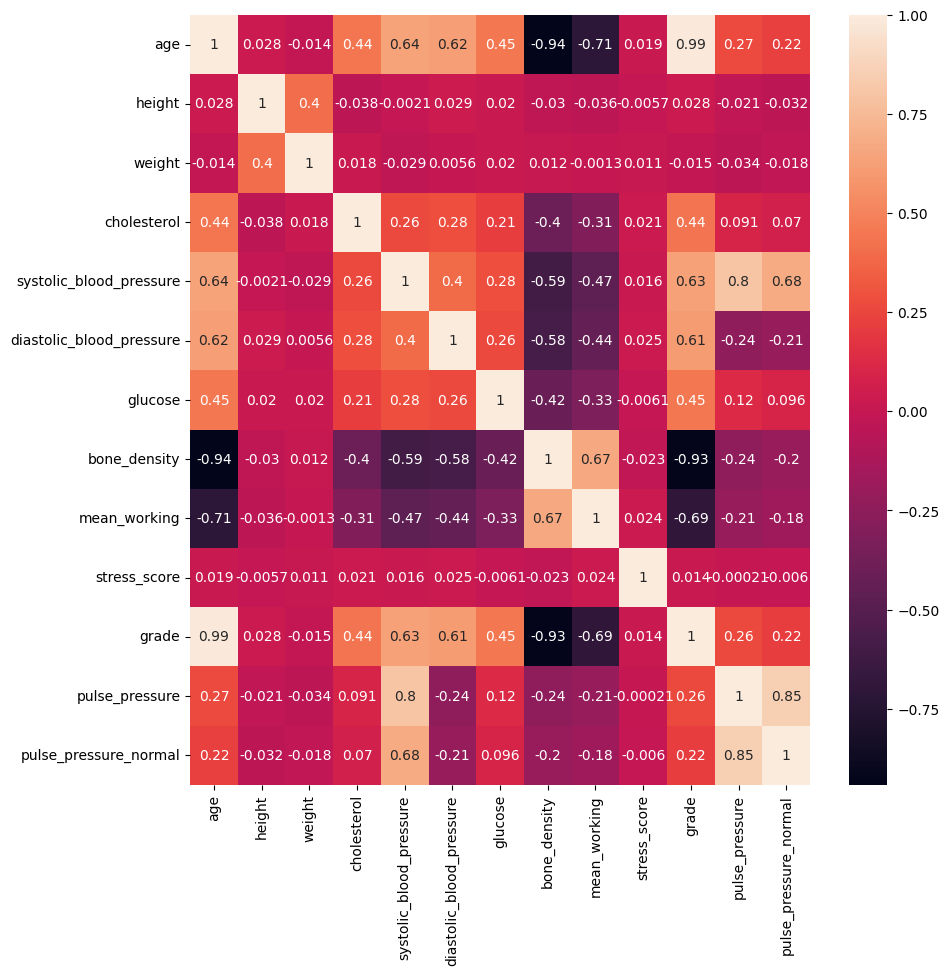

In [92]:
# 상관분석
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   int64  
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           3000 non-null   object 
 13  family_medical_history    3000 non-null   object 
 14  sleep_pa

In [102]:
#임시 모델링
train_tmp = train.drop(['ID','age','pulse_pressure','pulse_pressure_normal','activity','smoke_status','medical_history','family_medical_history','sleep_pattern',
                        'edu_level'],axis=1)
train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    3000 non-null   int64  
 1   height                    3000 non-null   float64
 2   weight                    3000 non-null   float64
 3   cholesterol               3000 non-null   float64
 4   systolic_blood_pressure   3000 non-null   int64  
 5   diastolic_blood_pressure  3000 non-null   int64  
 6   glucose                   3000 non-null   float64
 7   bone_density              3000 non-null   float64
 8   mean_working              3000 non-null   float64
 9   stress_score              3000 non-null   float64
 10  grade                     3000 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 257.9 KB


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import lightgbm
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import sklearn.model_selection
from sklearn.metrics import mean_absolute_error
import gc
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import classification_report, accuracy_score


import warnings 
warnings.filterwarnings('ignore')

In [ ]:
target = 'stress_score'


x = train_tmp.drop(target, axis=1)
y = train_tmp.loc[:, target]

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#modeling
tree_rg = DecisionTreeRegressor()
tree_rg.fit(x_train, y_train)
y_pred = tree_rg.predict(x_test)

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.25
RMSE: 0.35
R² Score: -0.486


In [109]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#modeling
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.20
RMSE: 0.26
R² Score: 0.158


In [110]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#modeling
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1362
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 10
[LightGBM] [Info] Start training from score 0.479954
MAE: 0.22
RMSE: 0.26
R² Score: 0.148


In [111]:
#train 문자형 데이터 => 레이블 인코딩 실시 (머선러닝 활용)
#'activity','smoke_status','medical_history','family_medical_history','sleep_pattern','edu_level'
from sklearn.preprocessing import LabelEncoder

cat_cols = train.select_dtypes(include='object').columns

for col in cat_cols:
    train[col] = LabelEncoder().fit_transform(train[col])

train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score,grade,pulse_pressure,pulse_pressure_normal
0,0,0,72,161.49,58.47,279.84,165,100,143.35,0.87,2,1,3,1,2,1,0.0,0.63,70,65,1
1,1,1,88,179.87,77.60,257.37,178,111,146.94,0.07,2,1,0,1,0,2,0.0,0.83,80,67,1
2,2,1,47,182.47,89.93,226.66,134,95,142.61,1.18,1,1,0,0,0,3,9.0,0.70,40,39,0
3,3,1,69,185.78,68.63,206.74,158,92,137.26,0.48,0,1,3,0,1,2,0.0,0.17,60,66,1
4,4,0,81,164.63,71.53,255.92,171,116,129.37,0.34,2,1,1,1,2,1,0.0,0.36,80,55,0


In [115]:
train_tmp = train.drop(['ID'], axis=1)

In [117]:
target = 'stress_score'

x = train_tmp.drop(target, axis=1)
y = train_tmp.loc[:, target]
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#modeling
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 19
[LightGBM] [Info] Start training from score 0.486187
MAE: 0.21
RMSE: 0.25
R² Score: 0.250
